In [1]:
import pandas as pd
from astropy.units import Quantity
from astropy.cosmology import FlatLambdaCDM

import xga
xga.NUM_CORES = 100
from xga.samples import ClusterSample
from xga.sources import GalaxyCluster
from xga.xspec import single_temp_apec
from xga.sas import emosaic

%matplotlib inline

Assembling list of ObsIDs: 100%|██████████| 21/21 [00:29<00:00,  1.42s/it]


In [2]:
cosmo = FlatLambdaCDM(70, 0.3)

In [3]:
src = GalaxyCluster(303.1271, -56.8319, 0.0556, 'Abell-3667', r500=Quantity(1.1, 'Mpc'), clean_obs_threshold=0.1)

In [5]:
src.info()


-----------------------------------------------------
Source Name - Abell-3667
User Coordinates - (303.1271, -56.8319) degrees
X-ray Peak - (303.10734342007964, -56.830898512176134) degrees
nH - 0.0425 1e+22 / cm2
Redshift - 0.056
XMM ObsIDs - 8
PN Observations - 7
MOS1 Observations - 7
MOS2 Observations - 8
On-Axis - 0
With regions - 8
Total regions - 8
Obs with 1 detection - 0
Obs with >1 matches - 0
Total exposure - 215.29 ks
Images associated - 44
Exposure maps associated - 44
Combined Ratemaps associated - 1
Spectra associated - 0
R500 - 1100.0 kpc
R500 SNR - 1196.8
-----------------------------------------------------



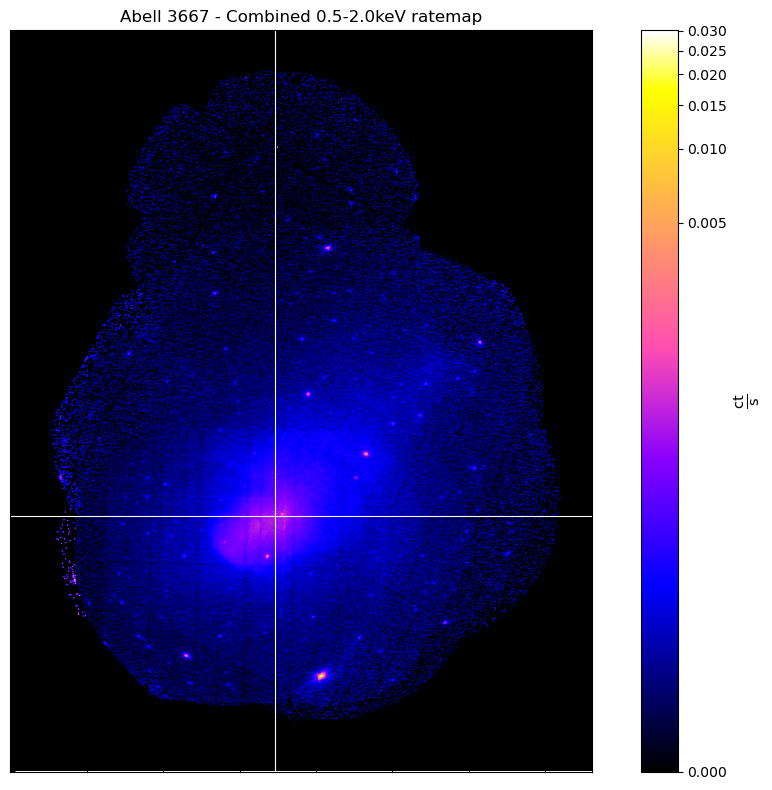

In [8]:
rt = src.get_combined_ratemaps()
rt.src_name = 'Abell 3667'
rt.view(src.ra_dec)

In [4]:
stop

NameError: name 'stop' is not defined

In [9]:
samp = pd.read_csv("../../sample_files/lovoccs_southnorth.csv")
samp['LoVoCCS_name'] = samp['LoVoCCSID'].apply(lambda x: 'LoVoCCS-' + str(x))
samp

,name,MCXC,LoVoCCSID,ra,dec,redshift,L500,M500,R500,alt_name,other_names,Notes,sub_samp,LoVoCCS_name
0,MCXCJ1558.3+2713,J1558.3+2713,0,239.585833,27.226944,0.0894,10.676087,8.1491,1.3803,RXCJ1558.3+2713,A2142,L,north,LoVoCCS-0
1,MCXCJ1510.9+0543,J1510.9+0543,1,227.729167,5.720000,0.0766,8.726709,7.2708,1.3344,A2029,A2029,NaN,south,LoVoCCS-1
2,MCXCJ0258.9+1334,J0258.9+1334,2,44.739583,13.579444,0.0739,6.088643,5.8488,1.2421,RXCJ0258.9+1334,A401,L,south,LoVoCCS-2
3,MCXCJ1348.8+2635,J1348.8+2635,3,207.220833,26.595556,0.0622,5.478067,5.5280,1.2236,RXCJ1348.8+2635,A1795,NaN,north,LoVoCCS-3
4,MCXCJ0041.8-0918,J0041.8-0918,4,10.458750,-9.301944,0.0555,5.100085,5.3163,1.2103,RXCJ0041.8-0918,A85,"L,losStr",south,LoVoCCS-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,MCXCJ0448.2-2028,J0448.2-2028,139,72.050833,-20.469722,0.0720,1.004022,1.9513,0.8620,RXCJ0448.2-2028,A514,losStr,south,LoVoCCS-139
140,MCXCJ2323.8+1648,J2323.8+1648,140,350.972917,16.808889,0.0416,1.002026,1.9896,0.8760,A2589,A2589,NaN,north,LoVoCCS-140
141,MCXCJ1416.8-1158,J1416.8-1158,141,214.214583,-11.976111,0.0982,1.001648,1.9133,0.8491,RXCJ1416.8-1158,NaN,X,south,LoVoCCS-141
142,MCXCJ1459.0-0843,J1459.0-0843,142,224.764583,-8.725000,0.1043,1.001337,1.9047,0.8461,RXCJ1459.0-0843,NaN,NaN,south,LoVoCCS-142


In [10]:
poss_targ = ['LoVoCCS-118', 'LoVoCCS-60', 'LoVoCCS-40', 'LoVoCCS-95', 'LoVoCCS-4', 'LoVoCCS-13', 'LoVoCCS-2']
targ_samp = samp[samp['LoVoCCS_name'].isin(poss_targ)]

targ_samp.loc[95, 'ra'] = 240.56
targ_samp.loc[95, 'dec'] = 15.965

targ_samp.loc[118, 'ra'] = 52.4602917
targ_samp.loc[118, 'dec'] = -52.58

targ_samp

,name,MCXC,LoVoCCSID,ra,dec,redshift,L500,M500,R500,alt_name,other_names,Notes,sub_samp,LoVoCCS_name
2,MCXCJ0258.9+1334,J0258.9+1334,2,44.739583,13.579444,0.0739,6.088643,5.8488,1.2421,RXCJ0258.9+1334,A401,L,south,LoVoCCS-2
4,MCXCJ0041.8-0918,J0041.8-0918,4,10.458750,-9.301944,0.0555,5.100085,5.3163,1.2103,RXCJ0041.8-0918,A85,"L,losStr",south,LoVoCCS-4
13,MCXCJ0257.8+1302,J0257.8+1302,13,44.457500,13.049167,0.0722,3.592916,4.2452,1.1169,RXCJ0257.8+1302,A399,NaN,south,LoVoCCS-13
40,MCXCJ1330.8-0152,J1330.8-0152,40,202.707917,-1.872778,0.0852,2.127767,3.0567,0.9968,RXCJ1330.8-0152,A1750,"DL,large elongation towards NE,losStr",south,LoVoCCS-40
60,MCXCJ2226.0+1722,J2226.0+1722,60,336.510833,17.378056,0.1072,1.706366,2.6308,0.9414,A2443,A2443,NaN,north,LoVoCCS-60
95,MCXCJ1602.3+1601,J1602.3+1601,95,240.560000,15.965000,0.0353,1.358380,2.4052,0.9351,A2147,A2147,NaN,north,LoVoCCS-95
118,MCXCJ0330.0-5235,J0330.0-5235,118,52.460292,-52.580000,0.0624,1.101682,2.0786,0.8831,RXCJ0330.0-5235,A3128,"DL,two maxima/NE-SW",south,LoVoCCS-118


In [ ]:
[2.90579, 5.8365, 4.37229, None, None, None, None]

In [ ]:
ra = targ_samp['ra'].values
dec = targ_samp['dec'].values
z = targ_samp['redshift'].values
r500 = Quantity(targ_samp['R500'].values, 'Mpc')
name = targ_samp['LoVoCCSID'].apply(lambda x: 'LoVoCCS-' + str(x)).values

srcs = ClusterSample(ra, dec, z, name, r500=r500, clean_obs=True, clean_obs_reg='r500', clean_obs_threshold=0.1, 
                     use_peak=False, load_fits=True)

srcs['LoVoCCS-95'].disassociate_obs(['0300350301', '0300350401'])
emosaic(srcs, 'image')
emosaic(srcs, 'expmap')

In [ ]:
for src in srcs:
    src.info()
    rt = src.get_combined_ratemaps()
#     rt.view(src.ra_dec, src.get_interloper_mask(), zoom_in=True)
    rt.view(src.ra_dec, zoom_in=True)    

In [ ]:
# errors = """[[SASGenerationError("/bin/sh: line 1:  2505 Segmentation fault      (core dumped) rmfgen rmfset=0744411901_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0744411901_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0744411901_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411901-mos1."), SASGenerationError('/bin/sh: line 1:  2507 Segmentation fault      (core dumped) arfgen spectrumset=0744411901_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0744411901_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0744411901_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411901/M1_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0744411901_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411901-mos1.'), SASGenerationError('/bin/sh: line 1:  2518 Segmentation fault      (core dumped) backscale spectrumset=0744411901_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411901/M1_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411901-mos1.'), SASGenerationError('/bin/sh: line 1:  3720 Segmentation fault      (core dumped) specgroup spectrumset=0744411901_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0744411901_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0744411901_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0744411901_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411901-mos1.'), SASGenerationError("/bin/sh: line 1:  2474 Segmentation fault      (core dumped) rmfgen rmfset=0744411701_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0744411701_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0744411701_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411701-mos1."), SASGenerationError('/bin/sh: line 1:  2476 Segmentation fault      (core dumped) arfgen spectrumset=0744411701_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0744411701_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0744411701_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411701/M1_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0744411701_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411701-mos1.'), SASGenerationError('/bin/sh: line 1:  2485 Segmentation fault      (core dumped) backscale spectrumset=0744411701_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411701/M1_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411701-mos1.'), SASGenerationError('/bin/sh: line 1:  3733 Segmentation fault      (core dumped) specgroup spectrumset=0744411701_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0744411701_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0744411701_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0744411701_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411701-mos1.'), SASGenerationError("/bin/sh: line 1:  2725 Segmentation fault      (core dumped) rmfgen rmfset=0065140101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0065140101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0065140101_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140101-mos2."), SASGenerationError('/bin/sh: line 1:  2727 Segmentation fault      (core dumped) arfgen spectrumset=0065140101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0065140101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0065140101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0065140101/M2_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0065140101_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140101-mos2.'), SASGenerationError('/bin/sh: line 1:  2735 Segmentation fault      (core dumped) backscale spectrumset=0065140101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0065140101/M2_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140101-mos2.'), SASGenerationError('/bin/sh: line 1:  3737 Segmentation fault      (core dumped) specgroup spectrumset=0065140101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0065140101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0065140101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0065140101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140101-mos2.'), SASGenerationError("/bin/sh: line 1:  2720 Segmentation fault      (core dumped) rmfgen rmfset=0065140101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0065140101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0065140101_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140101-mos1."), SASGenerationError('/bin/sh: line 1:  2721 Segmentation fault      (core dumped) arfgen spectrumset=0065140101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0065140101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0065140101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0065140101/M1_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0065140101_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140101-mos1.'), SASGenerationError('/bin/sh: line 1:  2746 Segmentation fault      (core dumped) backscale spectrumset=0065140101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0065140101/M1_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140101-mos1.'), SASGenerationError('/bin/sh: line 1:  3742 Segmentation fault      (core dumped) specgroup spectrumset=0065140101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0065140101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0065140101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0065140101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140101-mos1.'), SASGenerationError("/bin/sh: line 1:  3027 Segmentation fault      (core dumped) rmfgen rmfset=0723802101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0723802101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0723802101_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802101-mos1."), SASGenerationError('/bin/sh: line 1:  3029 Segmentation fault      (core dumped) arfgen spectrumset=0723802101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0723802101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0723802101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0723802101/M1_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0723802101_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802101-mos1.'), SASGenerationError('/bin/sh: line 1:  3039 Segmentation fault      (core dumped) backscale spectrumset=0723802101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0723802101/M1_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802101-mos1.'), SASGenerationError('/bin/sh: line 1:  3748 Segmentation fault      (core dumped) specgroup spectrumset=0723802101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0723802101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0723802101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0723802101_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802101-mos1.'), SASGenerationError("/bin/sh: line 1:  3057 Segmentation fault      (core dumped) rmfgen rmfset=0723802201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0723802201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0723802201_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802201-mos1."), SASGenerationError('/bin/sh: line 1:  3058 Segmentation fault      (core dumped) arfgen spectrumset=0723802201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0723802201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0723802201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0723802201/M1_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0723802201_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802201-mos1.'), SASGenerationError('/bin/sh: line 1:  3090 Segmentation fault      (core dumped) backscale spectrumset=0723802201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0723802201/M1_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802201-mos1.'), SASGenerationError('/bin/sh: line 1:  3770 Segmentation fault      (core dumped) specgroup spectrumset=0723802201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0723802201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0723802201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0723802201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802201-mos1.'), SASGenerationError("/bin/sh: line 1:  2535 Segmentation fault      (core dumped) rmfgen rmfset=0744411801_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0744411801_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0744411801_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411801-mos1."), SASGenerationError('/bin/sh: line 1:  2537 Segmentation fault      (core dumped) arfgen spectrumset=0744411801_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0744411801_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0744411801_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411801/M1_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0744411801_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411801-mos1.'), SASGenerationError('/bin/sh: line 1:  2578 Segmentation fault      (core dumped) backscale spectrumset=0744411801_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411801/M1_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411801-mos1.'), SASGenerationError('/bin/sh: line 1:  3781 Segmentation fault      (core dumped) specgroup spectrumset=0744411801_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0744411801_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0744411801_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0744411801_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411801-mos1.'), SASGenerationError("/bin/sh: line 1:  2412 Segmentation fault      (core dumped) rmfgen rmfset=0065140201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0065140201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0065140201_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140201-mos2."), SASGenerationError('/bin/sh: line 1:  2415 Segmentation fault      (core dumped) arfgen spectrumset=0065140201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0065140201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0065140201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0065140201/M2_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0065140201_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140201-mos2.'), SASGenerationError('/bin/sh: line 1:  2468 Segmentation fault      (core dumped) backscale spectrumset=0065140201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0065140201/M2_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140201-mos2.'), SASGenerationError('/bin/sh: line 1:  3788 Segmentation fault      (core dumped) specgroup spectrumset=0065140201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0065140201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0065140201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0065140201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140201-mos2.'), SASGenerationError("/bin/sh: line 1:  2635 Segmentation fault      (core dumped) rmfgen rmfset=0744930301_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0744930301_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0744930301_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744930301-mos1."), SASGenerationError('/bin/sh: line 1:  2636 Segmentation fault      (core dumped) arfgen spectrumset=0744930301_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0744930301_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0744930301_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744930301/M1_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0744930301_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744930301-mos1.'), SASGenerationError('/bin/sh: line 1:  2644 Segmentation fault      (core dumped) backscale spectrumset=0744930301_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744930301/M1_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744930301-mos1.'), SASGenerationError('/bin/sh: line 1:  3805 Segmentation fault      (core dumped) specgroup spectrumset=0744930301_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0744930301_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0744930301_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0744930301_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744930301-mos1.'), SASGenerationError("/bin/sh: line 1:  2413 Segmentation fault      (core dumped) rmfgen rmfset=0065140201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0065140201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0065140201_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140201-mos1."), SASGenerationError('/bin/sh: line 1:  2416 Segmentation fault      (core dumped) arfgen spectrumset=0065140201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0065140201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0065140201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0065140201/M1_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0065140201_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140201-mos1.'), SASGenerationError('/bin/sh: line 1:  2469 Segmentation fault      (core dumped) backscale spectrumset=0065140201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0065140201/M1_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140201-mos1.'), SASGenerationError('/bin/sh: line 1:  3880 Segmentation fault      (core dumped) specgroup spectrumset=0065140201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0065140201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0065140201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0065140201_mos1_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140201-mos1.'), SASGenerationError("/bin/sh: line 1:  2493 Segmentation fault      (core dumped) rmfgen rmfset=0744411701_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0744411701_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0744411701_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411701-mos2."), SASGenerationError('/bin/sh: line 1:  2495 Segmentation fault      (core dumped) arfgen spectrumset=0744411701_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0744411701_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0744411701_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411701/M2_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0744411701_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411701-mos2.'), SASGenerationError('/bin/sh: line 1:  2514 Segmentation fault      (core dumped) backscale spectrumset=0744411701_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411701/M2_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411701-mos2.'), SASGenerationError('/bin/sh: line 1:  3883 Segmentation fault      (core dumped) specgroup spectrumset=0744411701_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0744411701_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0744411701_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0744411701_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411701-mos2.'), SASGenerationError("/bin/sh: line 1:  2523 Segmentation fault      (core dumped) rmfgen rmfset=0744411901_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0744411901_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0744411901_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411901-mos2."), SASGenerationError('/bin/sh: line 1:  2524 Segmentation fault      (core dumped) arfgen spectrumset=0744411901_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0744411901_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0744411901_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411901/M2_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0744411901_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411901-mos2.'), SASGenerationError('/bin/sh: line 1:  2545 Segmentation fault      (core dumped) backscale spectrumset=0744411901_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411901/M2_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411901-mos2.'), SASGenerationError('/bin/sh: line 1:  3899 Segmentation fault      (core dumped) specgroup spectrumset=0744411901_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0744411901_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0744411901_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0744411901_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411901-mos2.'), SASGenerationError("/bin/sh: line 1:  3085 Segmentation fault      (core dumped) rmfgen rmfset=0723802201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0723802201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0723802201_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802201-mos2."), SASGenerationError('/bin/sh: line 1:  3086 Segmentation fault      (core dumped) arfgen spectrumset=0723802201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0723802201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0723802201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0723802201/M2_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0723802201_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802201-mos2.'), SASGenerationError('/bin/sh: line 1:  3096 Segmentation fault      (core dumped) backscale spectrumset=0723802201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0723802201/M2_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802201-mos2.'), SASGenerationError('/bin/sh: line 1:  3904 Segmentation fault      (core dumped) specgroup spectrumset=0723802201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0723802201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0723802201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0723802201_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802201-mos2.'), SASGenerationError("/bin/sh: line 1:  2536 Segmentation fault      (core dumped) rmfgen rmfset=0744411801_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0744411801_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0744411801_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411801-mos2."), SASGenerationError('/bin/sh: line 1:  2539 Segmentation fault      (core dumped) arfgen spectrumset=0744411801_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0744411801_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0744411801_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411801/M2_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0744411801_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411801-mos2.'), SASGenerationError('/bin/sh: line 1:  2577 Segmentation fault      (core dumped) backscale spectrumset=0744411801_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411801/M2_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411801-mos2.'), SASGenerationError('/bin/sh: line 1:  3913 Segmentation fault      (core dumped) specgroup spectrumset=0744411801_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0744411801_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0744411801_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0744411801_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411801-mos2.'), SASGenerationError("/bin/sh: line 1:  3046 Segmentation fault      (core dumped) rmfgen rmfset=0723802101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0723802101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0723802101_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802101-mos2."), SASGenerationError('/bin/sh: line 1:  3047 Segmentation fault      (core dumped) arfgen spectrumset=0723802101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0723802101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0723802101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0723802101/M2_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0723802101_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802101-mos2.'), SASGenerationError('/bin/sh: line 1:  3061 Segmentation fault      (core dumped) backscale spectrumset=0723802101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0723802101/M2_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802101-mos2.'), SASGenerationError('/bin/sh: line 1:  3939 Segmentation fault      (core dumped) specgroup spectrumset=0723802101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0723802101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0723802101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0723802101_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802101-mos2.'), SASGenerationError("/bin/sh: line 1:  2676 Segmentation fault      (core dumped) rmfgen rmfset=0744930301_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0744930301_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0744930301_pn_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744930301-mos2."), SASGenerationError('/bin/sh: line 1:  2678 Segmentation fault      (core dumped) arfgen spectrumset=0744930301_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0744930301_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0744930301_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744930301/M2_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0744930301_pn_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744930301-mos2.'), SASGenerationError('/bin/sh: line 1:  2718 Segmentation fault      (core dumped) backscale spectrumset=0744930301_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744930301/M2_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744930301-mos2.'), SASGenerationError('/bin/sh: line 1:  3958 Segmentation fault      (core dumped) specgroup spectrumset=0744930301_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0744930301_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0744930301_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0744930301_mos2_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744930301-mos2.'), SASGenerationError("/bin/sh: line 1:  2619 Segmentation fault      (core dumped) rmfgen rmfset=0065140201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0065140201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0065140201_mos2_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140201-pn."), SASGenerationError('/bin/sh: line 1:  2620 Segmentation fault      (core dumped) arfgen spectrumset=0065140201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0065140201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0065140201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0065140201/PN_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0065140201_mos2_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140201-pn.'), SASGenerationError('/bin/sh: line 1:  2658 Segmentation fault      (core dumped) backscale spectrumset=0065140201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0065140201/PN_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140201-pn.'), SASGenerationError('/bin/sh: line 1:  4282 Segmentation fault      (core dumped) specgroup spectrumset=0065140201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0065140201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0065140201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0065140201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140201-pn.'), SASGenerationError("/bin/sh: line 1:  2872 Segmentation fault      (core dumped) rmfgen rmfset=0065140101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0065140101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0065140101_mos2_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140101-pn."), SASGenerationError('/bin/sh: line 1:  2873 Segmentation fault      (core dumped) arfgen spectrumset=0065140101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0065140101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0065140101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0065140101/PN_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0065140101_mos2_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140101-pn.'), SASGenerationError('/bin/sh: line 1:  2914 Segmentation fault      (core dumped) backscale spectrumset=0065140101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0065140101/PN_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140101-pn.'), SASGenerationError('/bin/sh: line 1:  4362 Segmentation fault      (core dumped) specgroup spectrumset=0065140101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0065140101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0065140101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0065140101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0065140101-pn.'), SASGenerationError("/bin/sh: line 1:  2652 Segmentation fault      (core dumped) rmfgen rmfset=0744411701_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0744411701_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0744411701_mos2_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411701-pn."), SASGenerationError('/bin/sh: line 1:  2653 Segmentation fault      (core dumped) arfgen spectrumset=0744411701_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0744411701_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0744411701_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411701/PN_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0744411701_mos2_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411701-pn.'), SASGenerationError('/bin/sh: line 1:  2712 Segmentation fault      (core dumped) backscale spectrumset=0744411701_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411701/PN_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411701-pn.'), SASGenerationError('/bin/sh: line 1:  4363 Segmentation fault      (core dumped) specgroup spectrumset=0744411701_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0744411701_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0744411701_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0744411701_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411701-pn.'), SASGenerationError("/bin/sh: line 1:  2859 Segmentation fault      (core dumped) rmfgen rmfset=0744930301_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0744930301_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0744930301_mos2_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744930301-pn."), SASGenerationError('/bin/sh: line 1:  2860 Segmentation fault      (core dumped) arfgen spectrumset=0744930301_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0744930301_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0744930301_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744930301/PN_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0744930301_mos2_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744930301-pn.'), SASGenerationError('/bin/sh: line 1:  2908 Segmentation fault      (core dumped) backscale spectrumset=0744930301_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744930301/PN_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744930301-pn.'), SASGenerationError('/bin/sh: line 1:  5586 Segmentation fault      (core dumped) specgroup spectrumset=0744930301_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0744930301_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0744930301_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0744930301_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744930301-pn.'), SASGenerationError("/bin/sh: line 1:  2701 Segmentation fault      (core dumped) rmfgen rmfset=0744411901_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0744411901_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0744411901_mos2_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411901-pn."), SASGenerationError('/bin/sh: line 1:  2705 Segmentation fault      (core dumped) arfgen spectrumset=0744411901_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0744411901_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0744411901_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411901/PN_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0744411901_mos2_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411901-pn.'), SASGenerationError('/bin/sh: line 1:  2758 Segmentation fault      (core dumped) backscale spectrumset=0744411901_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411901/PN_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411901-pn.'), SASGenerationError('/bin/sh: line 1:  5623 Segmentation fault      (core dumped) specgroup spectrumset=0744411901_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0744411901_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0744411901_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0744411901_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411901-pn.'), SASGenerationError("/bin/sh: line 1:  2732 Segmentation fault      (core dumped) rmfgen rmfset=0744411801_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0744411801_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0744411801_mos2_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411801-pn."), SASGenerationError('/bin/sh: line 1:  2734 Segmentation fault      (core dumped) arfgen spectrumset=0744411801_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0744411801_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0744411801_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411801/PN_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0744411801_mos2_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411801-pn.'), SASGenerationError('/bin/sh: line 1:  2771 Segmentation fault      (core dumped) backscale spectrumset=0744411801_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0744411801/PN_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411801-pn.'), SASGenerationError('/bin/sh: line 1:  5699 Segmentation fault      (core dumped) specgroup spectrumset=0744411801_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0744411801_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0744411801_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0744411801_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0744411801-pn.'), SASGenerationError("/bin/sh: line 1:  3268 Segmentation fault      (core dumped) rmfgen rmfset=0723802101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0723802101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0723802101_mos2_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802101-pn."), SASGenerationError('/bin/sh: line 1:  3269 Segmentation fault      (core dumped) arfgen spectrumset=0723802101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0723802101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0723802101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0723802101/PN_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0723802101_mos2_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802101-pn.'), SASGenerationError('/bin/sh: line 1:  3371 Segmentation fault      (core dumped) backscale spectrumset=0723802101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0723802101/PN_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802101-pn.'), SASGenerationError('/bin/sh: line 1:  5748 Segmentation fault      (core dumped) specgroup spectrumset=0723802101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0723802101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0723802101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0723802101_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802101-pn.'), SASGenerationError("/bin/sh: line 1:  3467 Segmentation fault      (core dumped) rmfgen rmfset=0723802201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf spectrumset='0723802201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits' detmaptype=dataset detmaparray=0723802201_mos2_detmap.fits extendedsource=yes - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802201-pn."), SASGenerationError('/bin/sh: line 1:  3468 Segmentation fault      (core dumped) arfgen spectrumset=0723802201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits arfset=0723802201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf withrmfset=yes rmfset=0723802201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0723802201/PN_clean.fits extendedsource=yes detmaptype=dataset detmaparray=0723802201_mos2_detmap.fits setbackscale=no badpixmaptype=dataset - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802201-pn.'), SASGenerationError('/bin/sh: line 1:  3486 Segmentation fault      (core dumped) backscale spectrumset=0723802201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits badpixlocation=/mnt/gs21/scratch/turne540/lovoccs/X-LoVoCCS-Data/data/archives/LoVoCCS/processed_data/xmm_pointed/0723802201/PN_clean.fits - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802201-pn.'), SASGenerationError('/bin/sh: line 1:  5862 Segmentation fault      (core dumped) specgroup spectrumset=0723802201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_spec.fits overwrite=yes backgndset=0723802201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5_backspec.fits arfset=0723802201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.arf rmfset=0723802201_pn_LoVoCCS-4_ra10.45875_dec-9.301944444_ri0.0_ro0.31187271817384415_grpTrue_mincnt5.rmf addfilenames=no mincounts=5 - Try examining an image of the cluster with regions subtracted, and have a look at where your coordinate lies.-- LoVoCCS-4 is the associated source, the specific data used is 0723802201-pn.')]]"""

# to_dis = {}
# for err in errors.split('SASGenerationError('):
#     name = err.split(' is the associated source,')[0].split('- ')[-1]
    
#     if 'LoVoCCS' in name:
#         if name not in to_dis:
#             to_dis[name] = {}
#         obs_id, inst = err.split('the specific data used is ')[-1].split(".")[0].split('-')
#         if obs_id in to_dis[name]:
#             to_dis[name][obs_id].append(inst)
#         else:
#             to_dis[name][obs_id] = [inst]

# for name in to_dis:
#     for oi in to_dis[name]:
#         to_dis[name][oi] = list(set(to_dis[name][oi]))
#     srcs[name].disassociate_obs(to_dis[name])
# to_dis

In [ ]:
# single_temp_apec(srcs, 'r500', one_rmf=False)
single_temp_apec(srcs, Quantity(800, 'kpc'), one_rmf=False)

In [ ]:
srcs.names

In [ ]:
print(srcs.Tx(Quantity(800, 'kpc')))

In [ ]:
for src in srcs:
    sps = src.get_spectra(Quantity(800, 'kpc'))
    for sp in sps:
        sp.view()

In [ ]:
for src in srcs:
    print(src.name)
    try:
        print(src.get_results(Quantity(800, 'kpc')))
        print('')
    except:
        pass

In [ ]:
srcs['LoVoCCS-4'].info()

In [ ]:
srcs['LoVoCCS-4'].get_spectra(Quantity(800, 'kpc'), obs_id='0723802101')[0].get_rate('constant*tbabs*apec')

In [ ]:
srcs['LoVoCCS-4'].get_spectra(Quantity(800, 'kpc'), obs_id='0723802101')[0].header['FILTER']

In [ ]:
srcs['LoVoCCS-95'].get_combined_ratemaps().view(mask=srcs['LoVoCCS-95'].get_custom_mask(Quantity(600, 'kpc')))

In [ ]:
single_temp_apec(srcs['LoVoCCS-95'], Quantity(600, 'kpc'))

In [ ]:
rt = srcs['LoVoCCS-4'].get_combined_ratemaps()

rt.src_name = 'Abell 85'
rt.view()

In [ ]:
rt = srcs['LoVoCCS-13'].get_combined_ratemaps()

rt.src_name = 'Abell 399'
rt.view()

In [ ]:
rt = srcs['LoVoCCS-2'].get_combined_ratemaps()

rt.src_name = 'Abell 401'
rt.view()